In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np


data = pd.read_csv("C:\\Users\\Jeffm\\OneDrive\\DATA 747\\Final Project\\Dataset-Boston-2019.csv")

print(data)

print("Dataset Overview")
print(data.info())

print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Basic statistics
print("\nSummary Statistics:")
print(data.describe())

       Rank_Tot  Age Gender        Country Result_hr  Result_sec  Rank_Gender  \
0             1   30      M          Kenya   2:07:57        7677            1   
1             2   29      M       Ethiopia   2:07:59        7679            2   
2             3   34      M          Kenya   2:08:07        7687            3   
3             4   32      M          Kenya   2:08:54        7734            4   
4             5   26      M          Kenya   2:08:55        7735            5   
...         ...  ...    ...            ...       ...         ...          ...   
26646     26640   44      F  United States   6:21:19       22879        11977   
26647     26641   50      F  United States   6:22:27       22947        11978   
26648     26648   32      F  United States   6:35:50       23750        11979   
26649     26650   55      F  United States   6:53:38       24818        11980   
26650     26652   46      F  United States   6:59:57       25197        11981   

      Country_code  
0     

Data Preparation
In this section, we will focus on preparing the marathonn dataset for further analysis. The data includes a finish time by hour but is not shown as a time value. We will convert it. It also has a gender column that displays M for male and F female. We also will create an age group bracket as in common in race results.

In [5]:
# Convert the 'Time' column to timedelta
data['Time_as_timedelta'] = data['Result_hr'].apply(
    lambda x: timedelta(hours=int(x.split(':')[0]), 
                        minutes=int(x.split(':')[1]), 
                        seconds=int(x.split(':')[2]))
)

# Custom formatting to ensure hh:mm:ss only
data['Formatted_Time'] = data['Time_as_timedelta'].apply(
    lambda td: f"{td.seconds // 3600:02}:{(td.seconds % 3600) // 60:02}:{td.seconds % 60:02}"
)

#create age groups
def categorize_age(age):
    if age < 18:
        return "U18"
    if age < 40:
        return "18-39"
    elif 40 <= age < 50:
        return "40-49"
    elif 50 <= age < 60:
        return "50-59"
    elif 60 <= age < 70:
        return "60-69"
    else:
        return "70+"

# Apply the function to the 'Age' column and create a new 'Age Group' column
data['Age Group'] = data['Age'].apply(categorize_age)

# Display the first few rows to verify
print(data[['Age', 'Age Group']].head())

#create a minutes column
data['Minutes'] = data['Result_sec'] / 60

# Round the Minutes to two decimal places
data['Minutes'] = data['Minutes'].round(0)

# Display the updated dataframe
print(data[['Result_sec', 'Minutes']].head())

# Drop irrelevant columns
columns_to_drop = ['Result_hr', 'Time_as_timedelta']
data = data.drop(columns_to_drop, axis=1)

# Rename 'Formatted_Time' to 'Finish_Net'
data.rename(columns={'Formatted_Time': 'Finish_Net'}, inplace=True)

# Verify the change by checking the column names
print(data.columns)

#Save processed dataset to a CSV file
data.to_csv('preprocessed_marathon_dataset.csv', index=False)

   Age Age Group
0   30     18-39
1   29     18-39
2   34     18-39
3   32     18-39
4   26     18-39
   Result_sec  Minutes
0        7677    128.0
1        7679    128.0
2        7687    128.0
3        7734    129.0
4        7735    129.0
Index(['Rank_Tot', 'Age', 'Gender', 'Country', 'Result_sec', 'Rank_Gender',
       'Country_code', 'Finish_Net', 'Age Group', 'Minutes'],
      dtype='object')


Exploratory Data Analysis (EDA)
Perform various visualizations to explore and gain insights from the Boston Marathon dataset
1: Histogram of the distribution of ages
2: Histogram of the distribution of ages by gender
3: Box plots of finish times by age grouping

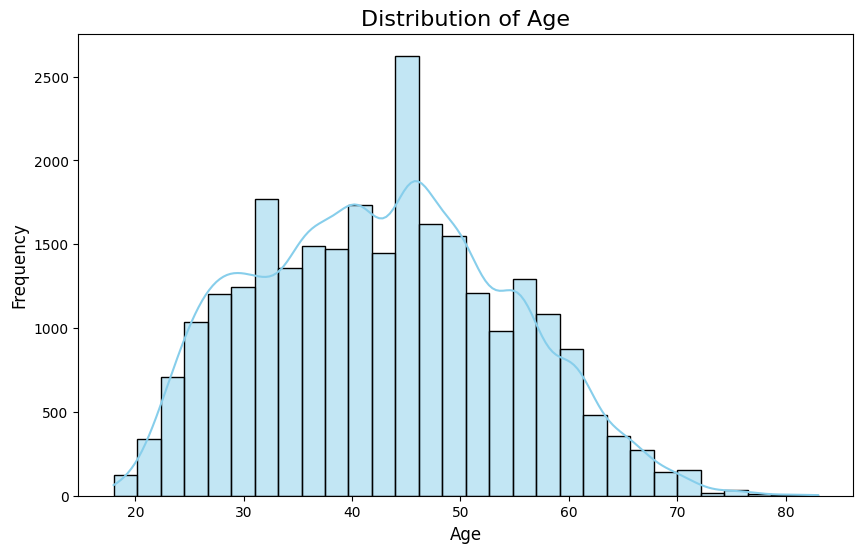

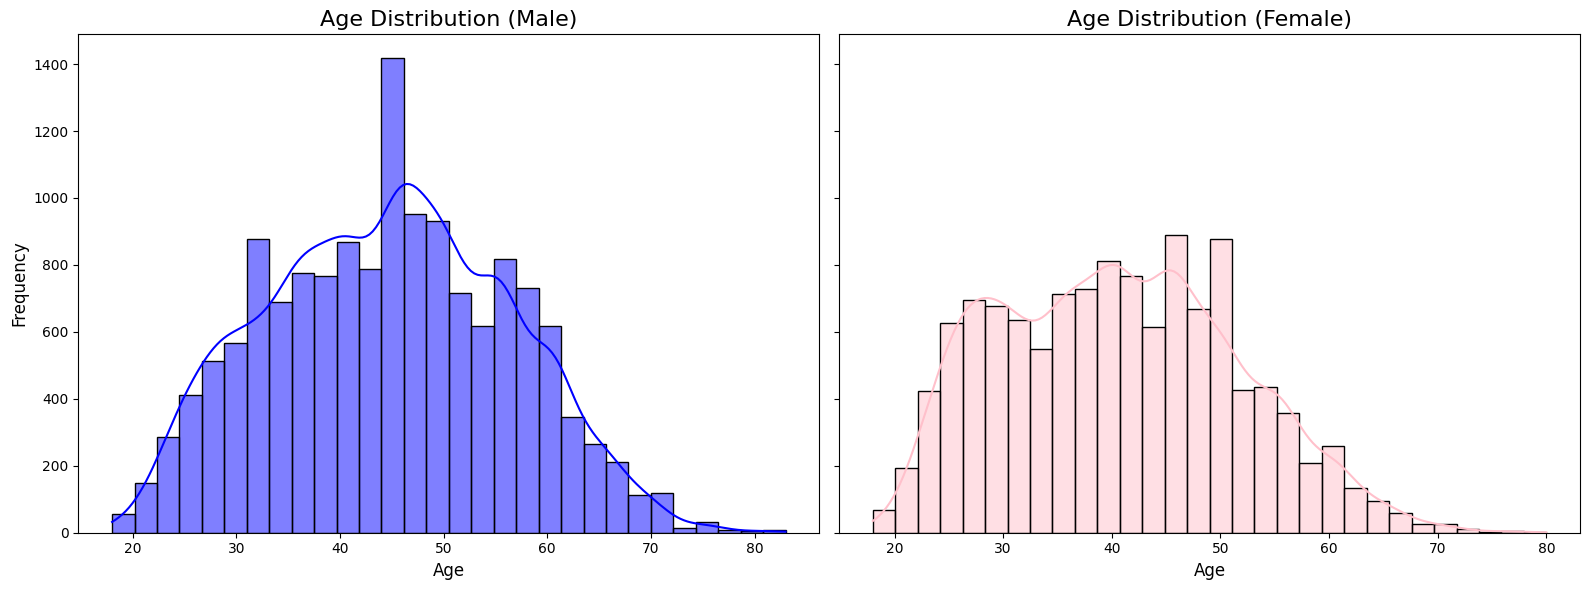

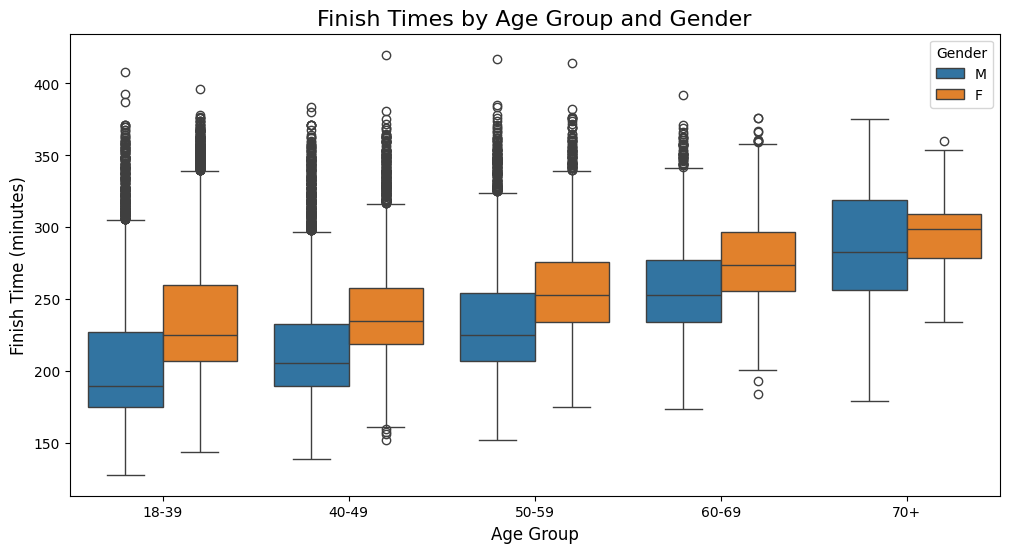

<Figure size 1400x800 with 0 Axes>

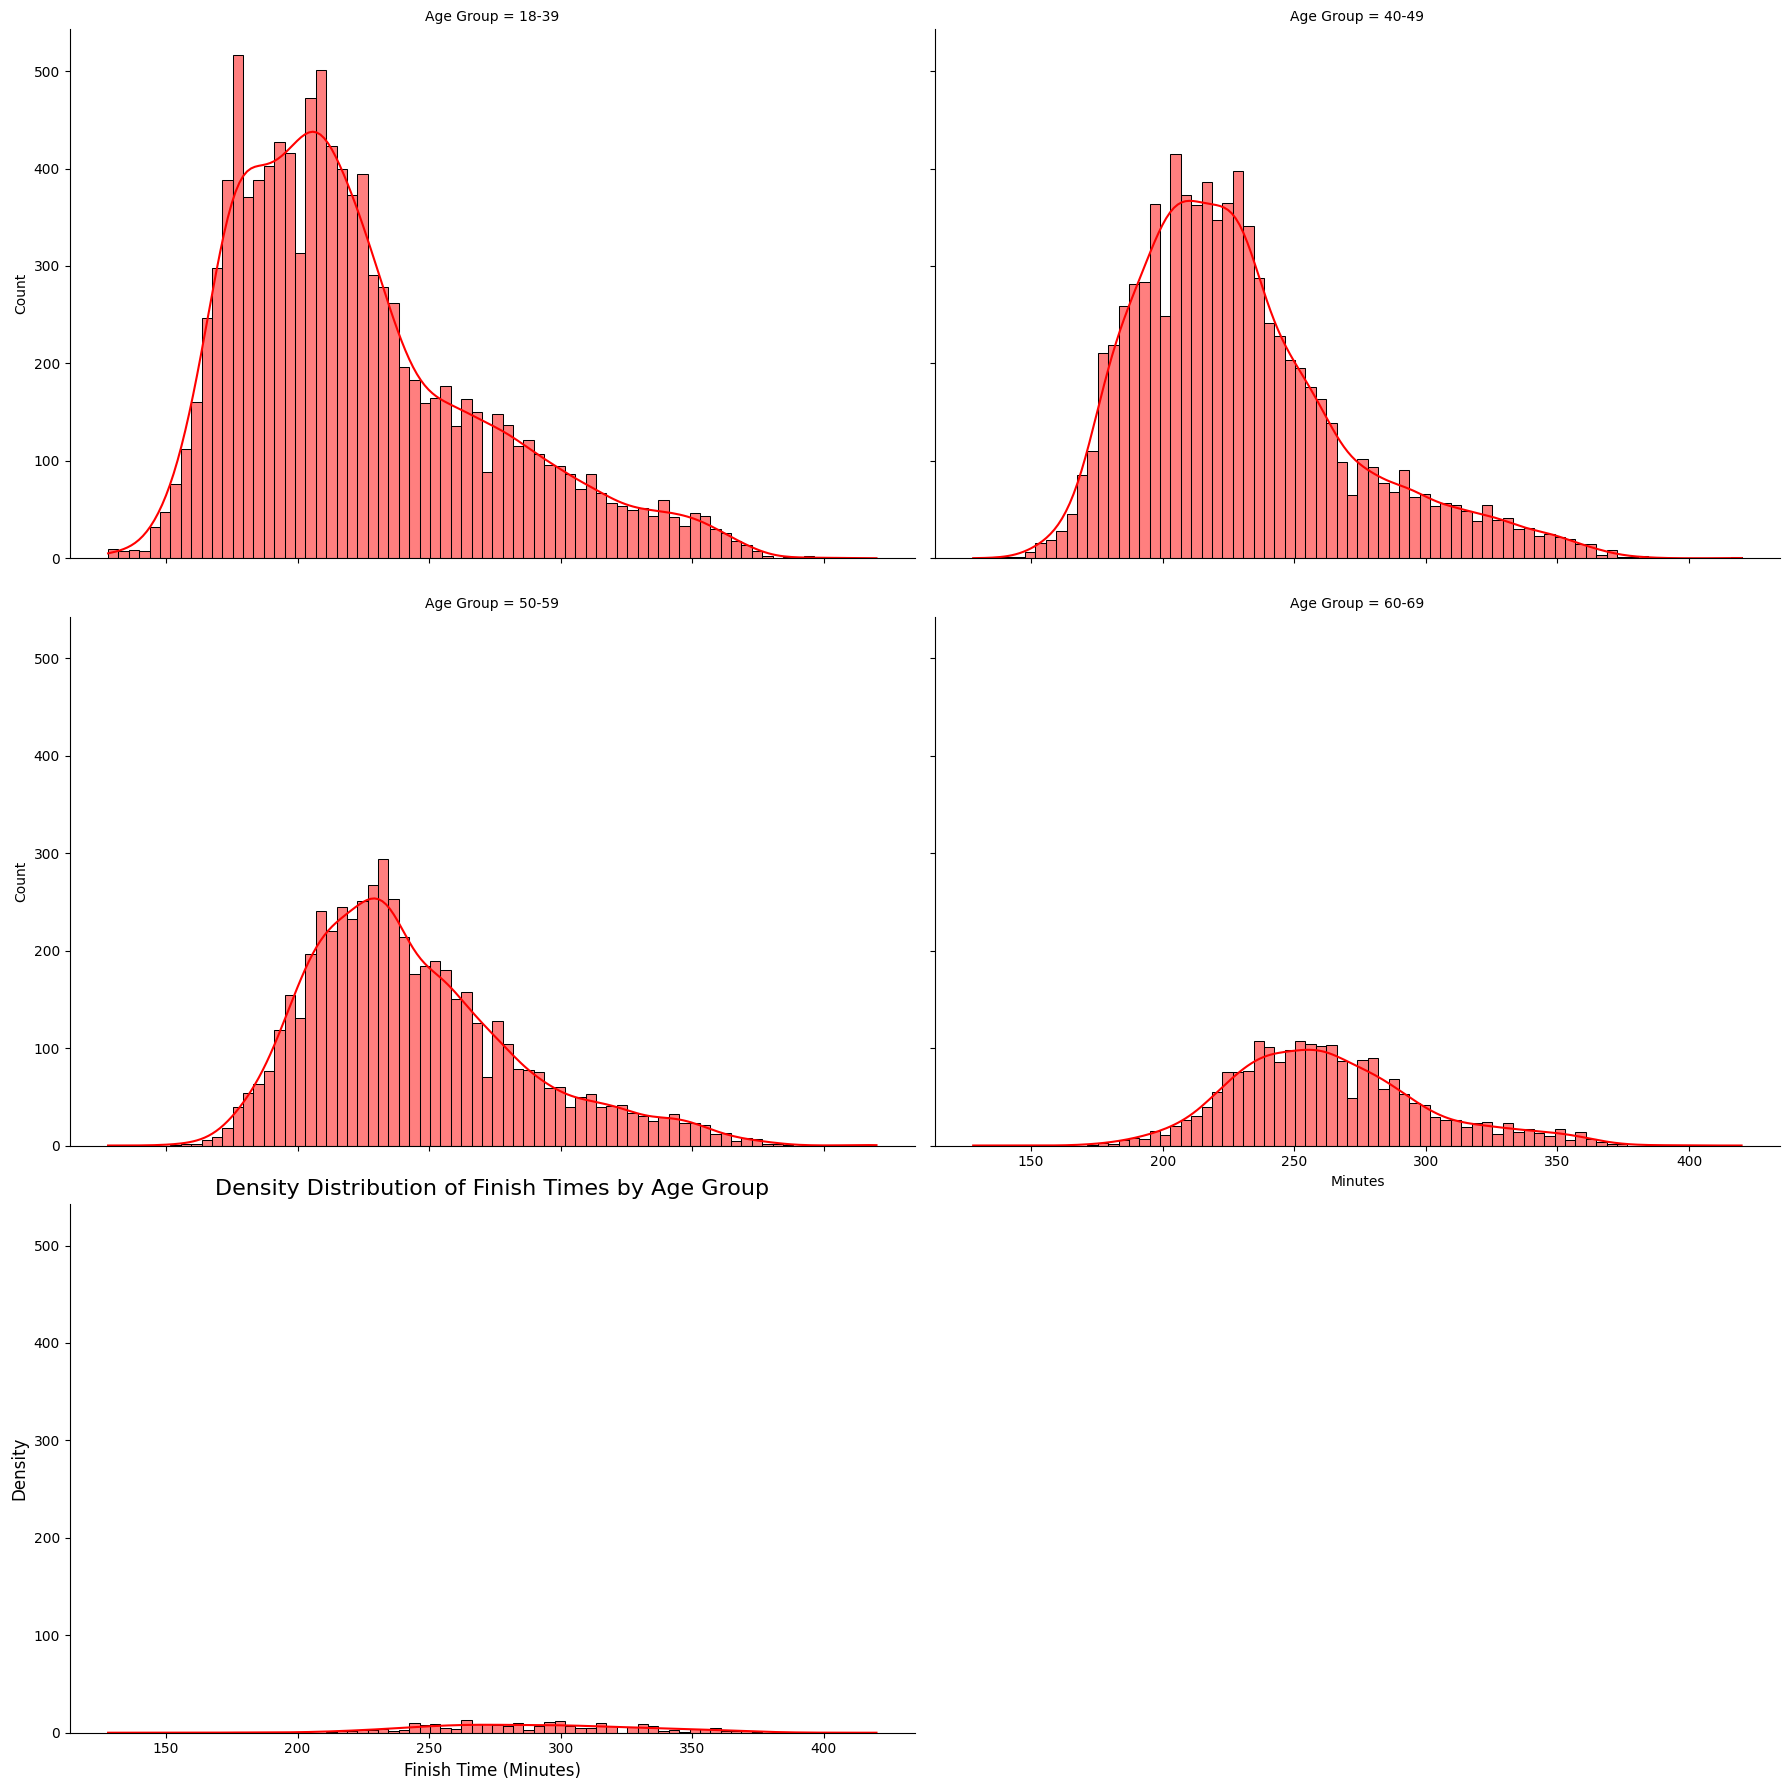

                   count        mean        std    min    25%    50%    75%  \
Gender Age Group                                                              
F      18-39      5660.0  237.755124  43.687634  144.0  207.0  225.0  260.0   
       40-49      3675.0  243.405442  35.460559  152.0  219.0  235.0  258.0   
       50-59      2028.0  259.393491  34.992479  175.0  234.0  253.0  276.0   
       60-69       571.0  278.010508  33.657249  184.0  256.0  274.0  297.0   
       70+          47.0  295.127660  27.244159  234.0  278.5  299.0  309.0   
M      18-39      5091.0  206.465135  45.967454  128.0  175.0  190.0  227.0   
       40-49      4435.0  218.174972  41.343583  139.0  190.0  206.0  233.0   
       50-59      3408.0  234.639965  39.948203  152.0  207.0  225.0  254.0   
       60-69      1554.0  257.467825  35.070556  174.0  234.0  253.0  277.0   
       70+         182.0  287.335165  41.199324  179.0  256.5  283.0  319.0   

                    max  
Gender Age Group         

In [6]:
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Male Age Distribution
sns.histplot(data[data['Gender'] == 'M']['Age'], kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title("Age Distribution (Male)", fontsize=16)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Female Age Distribution
sns.histplot(data[data['Gender'] == 'F']['Age'], kde=True, bins=30, color='pink', ax=axes[1])
axes[1].set_title("Age Distribution (Female)", fontsize=16)
axes[1].set_xlabel("Age", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(
    data=data, 
    x='Age Group', 
    y='Minutes', 
    hue='Gender'
)

# Add title and labels
plt.title("Finish Times by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Finish Time (minutes)", fontsize=12)

# Show the plot
plt.legend(title="Gender")
plt.show()

# Create a displot of finish times by age group
plt.figure(figsize=(14, 8))
sns.displot(data=data, x='Minutes', col = 'Age Group', col_wrap = 2, kde = True, height=6, aspect=1.5, color =('r'))

# Add titles and labels
plt.title("Density Distribution of Finish Times by Age Group", fontsize=16)
plt.xlabel("Finish Time (Minutes)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Group by 'Gender' and 'Age Group' and compute descriptive statistics for 'Age'
age_stats = data.groupby(['Gender', 'Age Group']).describe()['Minutes']

# Display the result
print(age_stats)


In this section, we will apply a modelling technique to classify and cluster different runners based on their time and age. We will use K-Means, an unsupervised learning model to cluster the runners and determine any patterns and draw some inferences. Through trial and error using the elbow method, we will change the number of clusters that best fit the data.

Index(['Rank_Tot', 'Age', 'Gender', 'Country', 'Result_sec', 'Rank_Gender',
       'Country_code', 'Finish_Net', 'Age Group', 'Minutes', 'Gender_encoded',
       'Country_encoded', 'Country Code_encoded', 'Cluster'],
      dtype='object')


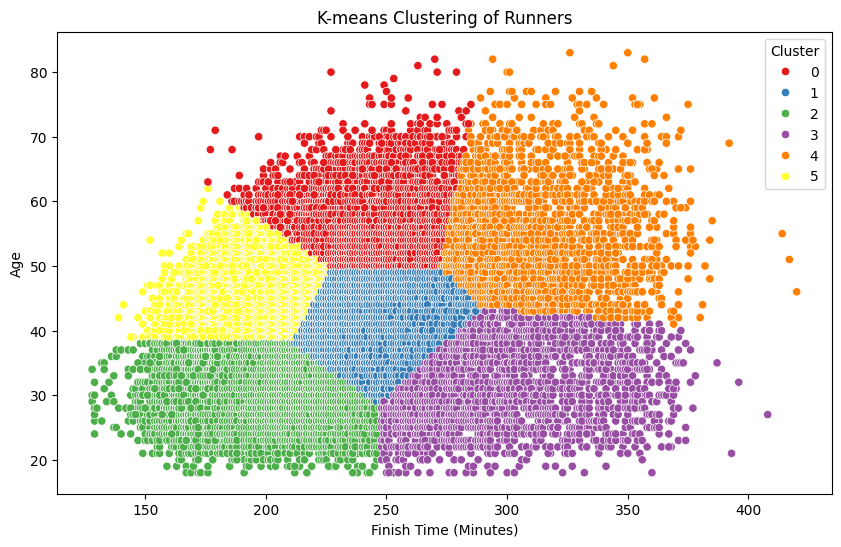

Cluster Centers:
[[241.5660059   57.48650358]
 [241.43283271  41.85711306]
 [195.63812528  30.46116869]
 [298.59209486  30.91462451]
 [310.33763094  55.07010475]
 [198.06334925  45.85347044]]


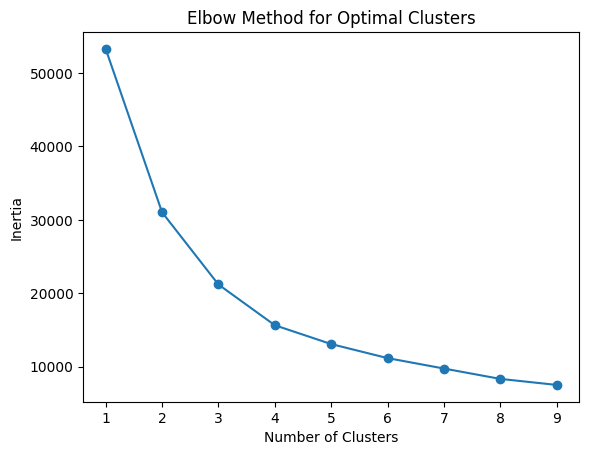

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the categorical variables
data['Gender_encoded'] = label_encoder.fit_transform(data['Gender'])
data['Country_encoded'] = label_encoder.fit_transform(data['Country'])
data['Country Code_encoded'] = label_encoder.fit_transform(data['Country_code'])

# Display the updated dataframe
print(data.columns)

# Step 1: Select features for clustering
features = data[['Minutes', 'Age']]  # Adjust this to include other relevant columns

# Step 2: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Change n_clusters as needed
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Minutes', y='Age', hue='Cluster', palette='Set1')
plt.title("K-means Clustering of Runners")
plt.xlabel("Finish Time (Minutes)")
plt.ylabel("Age")
plt.legend(title="Cluster")
plt.show()

# Step 5: Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [47]:
cluster_sizes = data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Cluster Sizes:
Cluster
2    6675
5    5450
1    4780
0    4746
3    2531
4    2469
Name: count, dtype: int64
Silhouette Score: 0.34489319495459686
